<a href="https://colab.research.google.com/github/sk1252k5/deeplearning_TF_Keras/blob/main/SGD_vs_GD/SGD_vs_BGD_Gradiant_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df = pd.read_csv('/content/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [ ]:
sc = preprocessing.MinMaxScaler()
scaled_x =sc.fit_transform(df.drop('price',axis = 'columns'))
scaled_y = sc.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
scaled_x.shape

(20, 2)

In [ ]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

Batch Gradiant Descent

In [ ]:
def batch_gradiant_decent(x,y_true,epochs,l_rate=0.1):
  no_of_features = x.shape[1]
  w = np.ones(shape=(no_of_features))
  b = 0
  total_samples = x.shape[0]
  cost_list = []
  epoch_list= []
  for i in range(epochs):
    y_pred = np.dot(w,scaled_x.T) + b
    w_d = w_grad = -(2/total_samples)*(x.T.dot(y_true - y_pred))
    b_grad = -(2/total_samples)*np.sum(y_true-y_pred)
    w = w -l_rate*w_d
    b = b - l_rate*b_grad
    cost = np.mean(np.square(y_true - y_pred))
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list
w , b, cost, cost_list, epoch_list = batch_gradiant_decent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w , b ,cost

(array([0.75550442, 0.41573953]), -0.11682769564715854, 0.0034268126227234427)

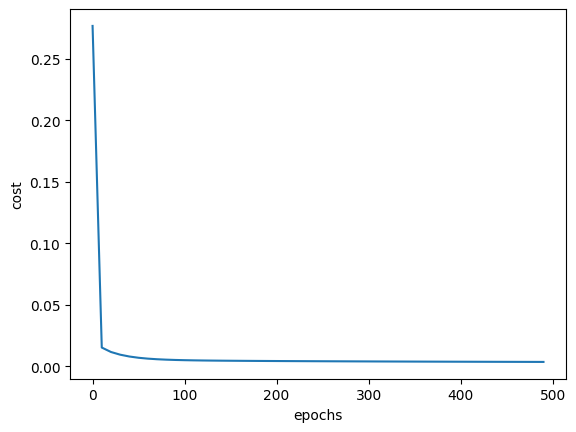

In [ ]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [ ]:
import random


2. Stochastic Gradient Descent Implementation

In [ ]:
def st_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_d = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_d = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_d
        b = b - learning_rate * b_d

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = st_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70726811, 0.67348138]), -0.22704868651780916, 0.00018882304746892207)